###Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal:
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Importing the Data

In [482]:
import pandas as pd
import seaborn as snsexam
import numpy as np
from sklearn.metrics import r2_score

from sklearn import metrics

import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [483]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [484]:
Car_Price_Prediction=pd.read_csv('/content/drive/MyDrive/ML Learning csv/CarPrice_Assignment.csv')

Exploring data type and structure

In [485]:
Car_Price_Prediction.info()
Car_Price_Prediction.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [486]:
Car_Price_Prediction.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Cleaning the Data

In [487]:
Car_Price_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [488]:
df=Car_Price_Prediction

In [489]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
0,car_ID,0,0.0
1,symboling,0,0.0
24,highwaympg,0,0.0
23,citympg,0,0.0
22,peakrpm,0,0.0
21,horsepower,0,0.0
20,compressionratio,0,0.0
19,stroke,0,0.0
18,boreratio,0,0.0
17,fuelsystem,0,0.0


No missing values

In [490]:
# Splitting company name from CarName column
CompanyName=df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [491]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)


Fixing invalid values

There seems to be some spelling error in the CompanyName column.

    maxda = mazda
    Nissan = nissan
    porsche = porcshce
    toyota = toyouta
    vokswagen = volkswagen = vw



In [492]:

df.CompanyName=df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
df.CompanyName.unique()



array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [493]:
#Checking for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### Plot of each numerical and categorical features to see distribution

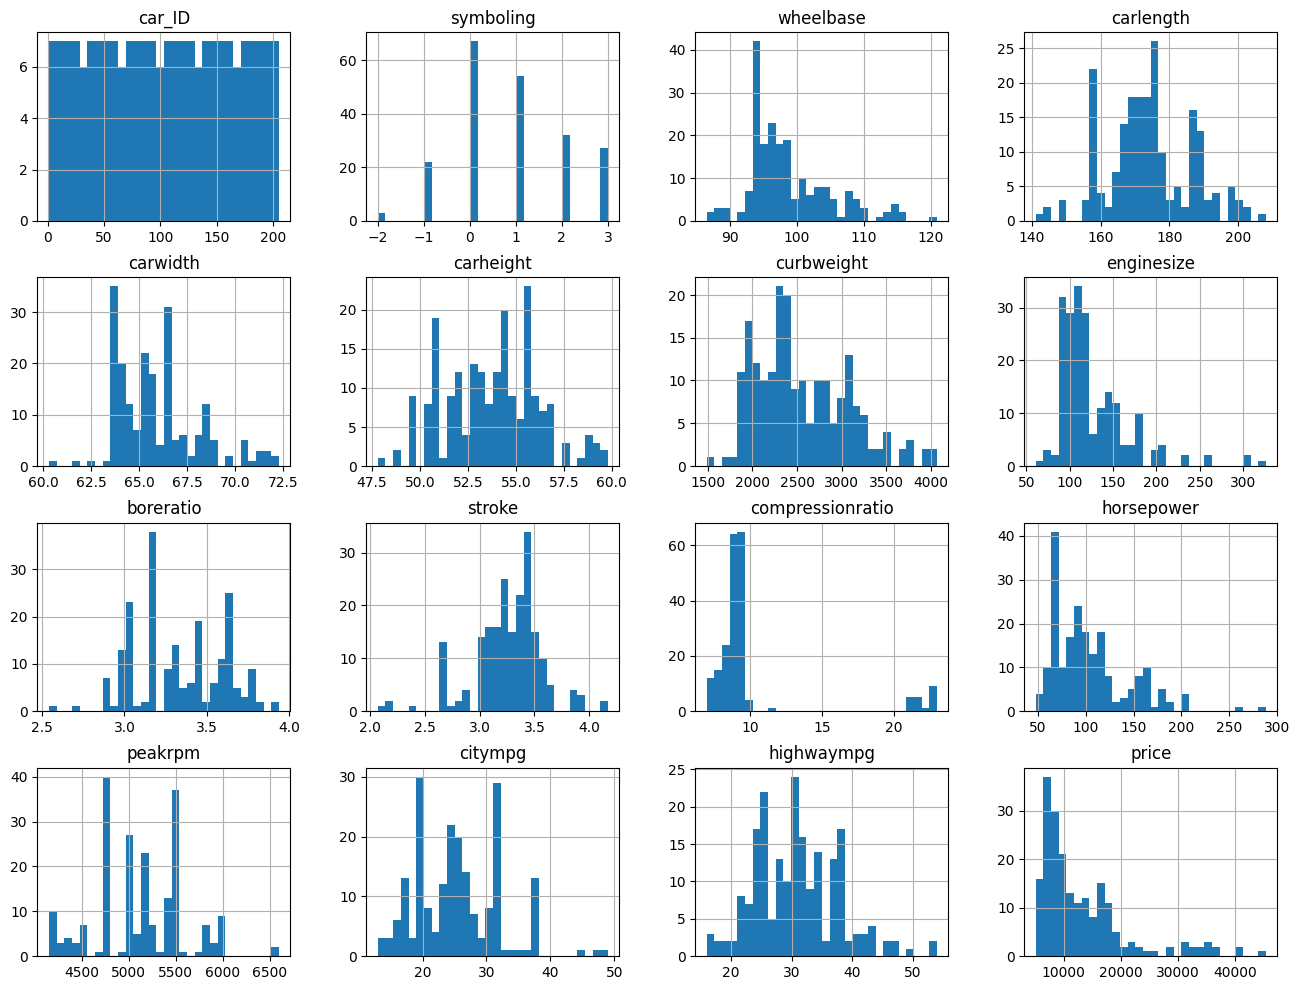

In [494]:
#plot a histogram for each numerical attribute
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(16,12))
plt.show()

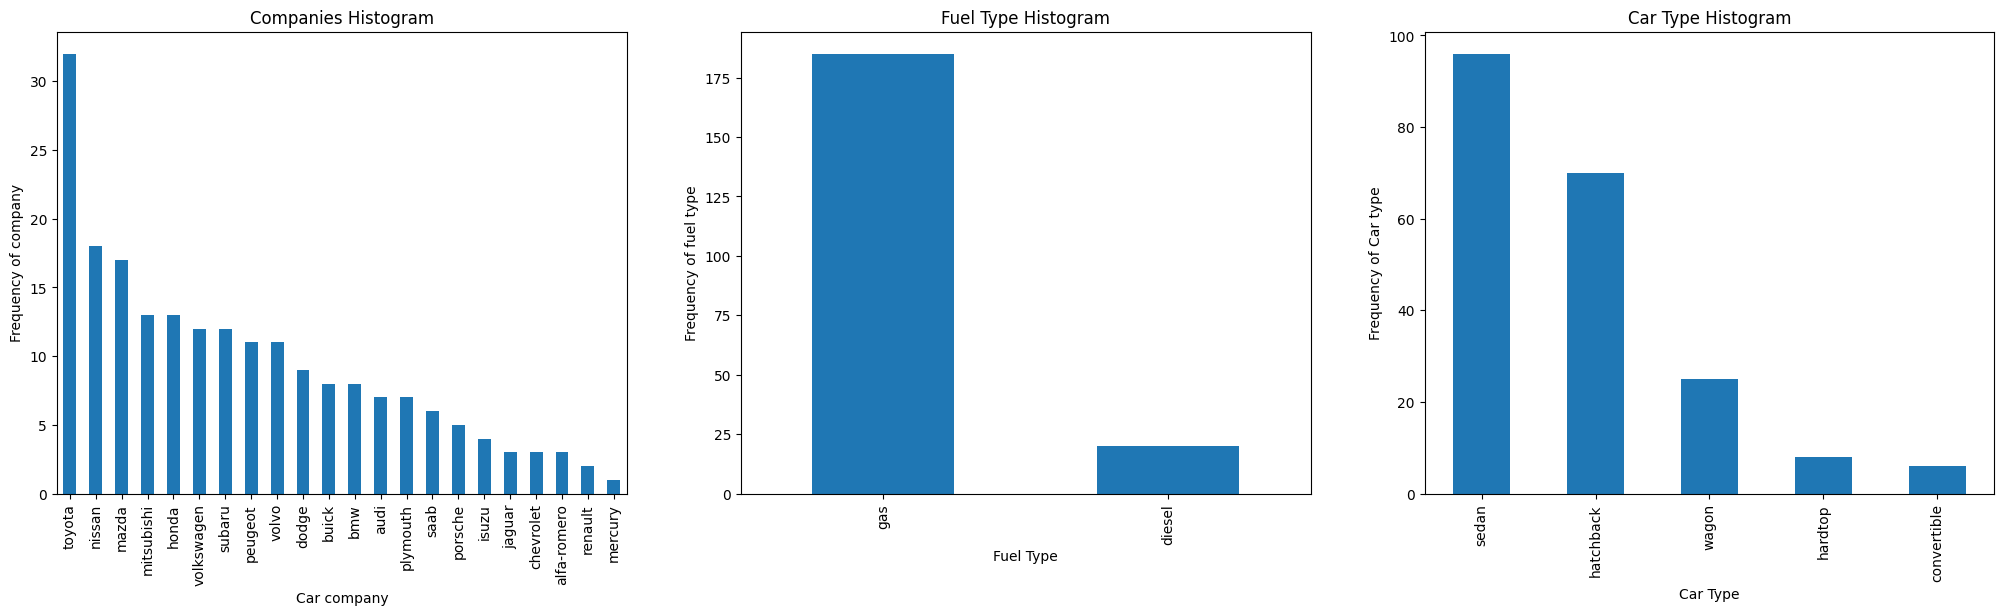

In [495]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind ='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

###Correlation Plot

<ipython-input-496-b5f20d20d97d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = Car_Price_Prediction.corr()


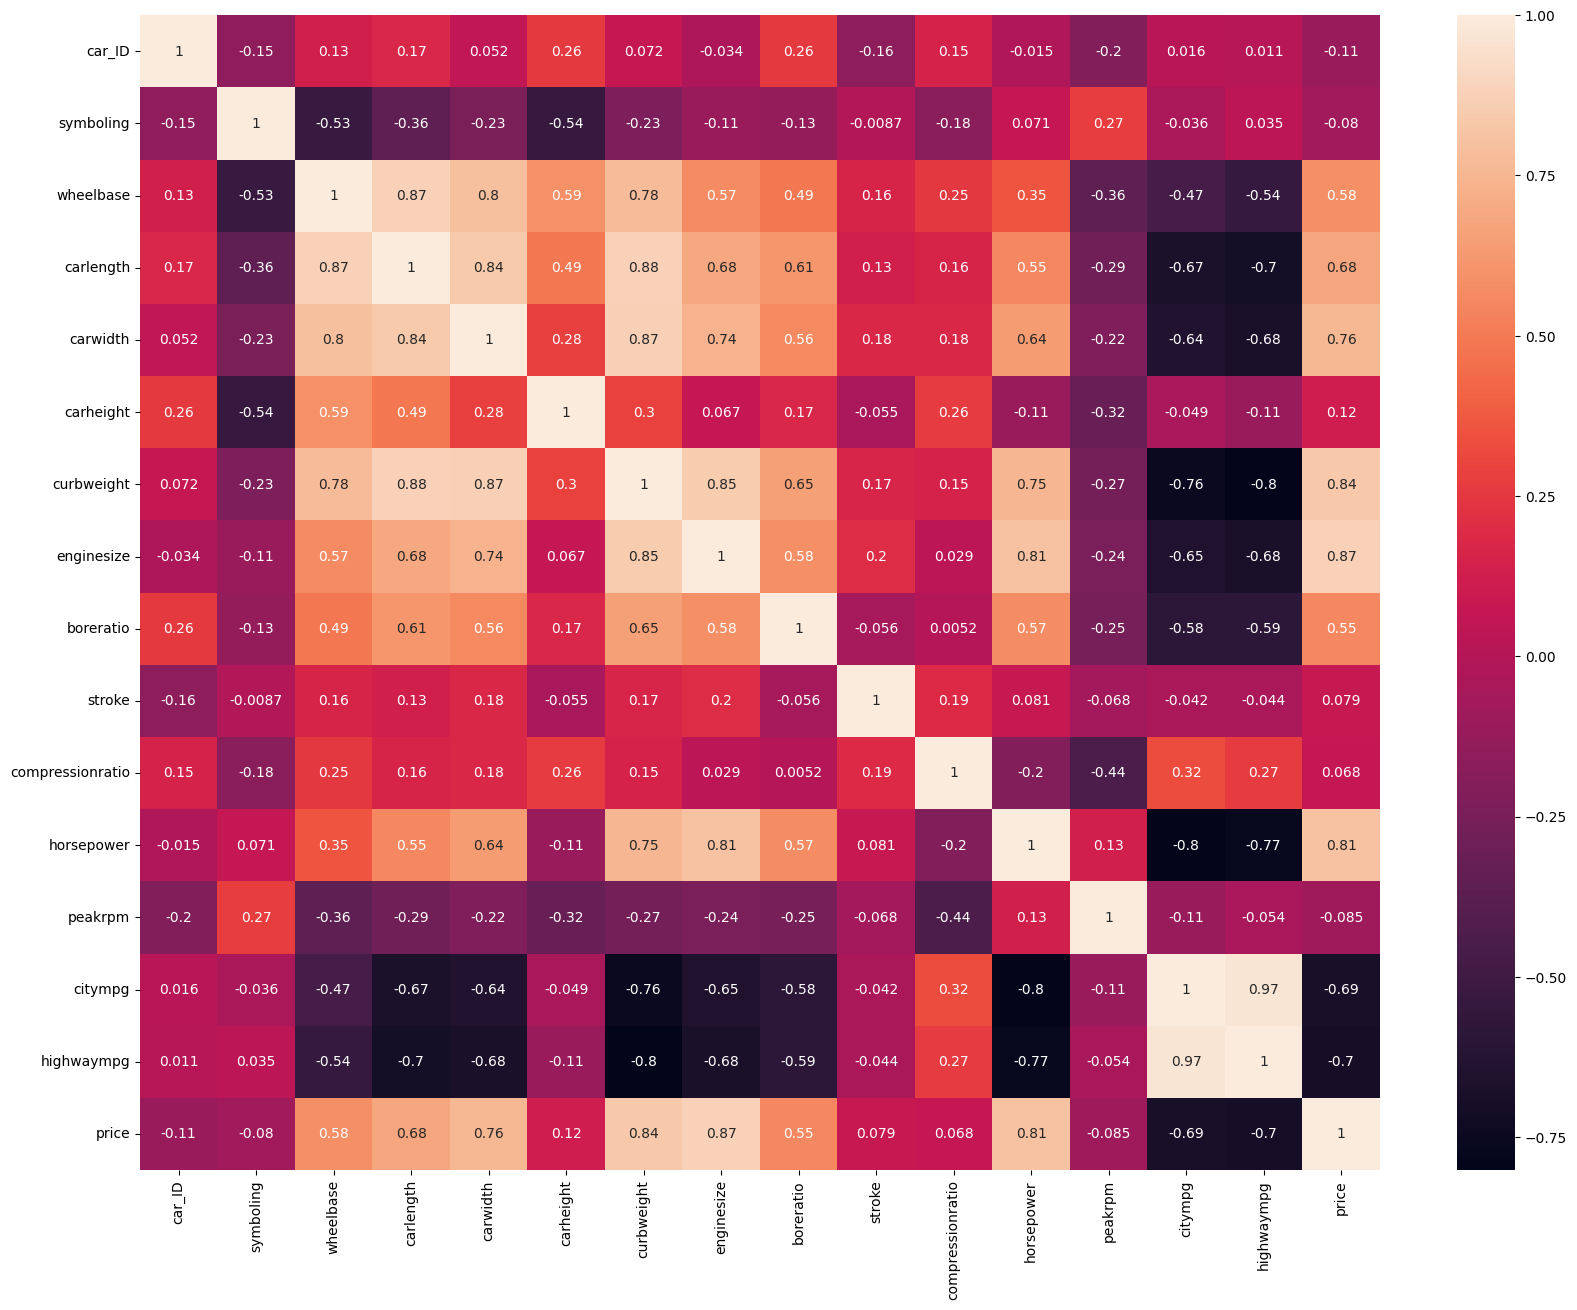

In [496]:
correlations = Car_Price_Prediction.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlations, annot = True);

####Use LabelEncoder to do the numeric transformation for objects

In [497]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns.values:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

##MODEL BUILDING

Train Test Split

In [498]:
# Create feature and target variable for problem
X_class= df.drop('price', axis=1)
y_class = df['price']

In [499]:
from sklearn.model_selection import train_test_split

In [500]:
x_train,x_test,y_train,y_test=train_test_split(X_class,y_class,train_size=0.8)

In [501]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.fit_transform(x_test)

In [502]:
x_train.shape

(164, 25)

## FEATURE IMPORTANCE MODEL

In [503]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt


 RandomForestRegressor

In [504]:
rf = RandomForestRegressor(n_estimators=100)
rf = rf.fit(rescaledX_train,y_train)

In [505]:
rf.feature_importances_

array([1.44669697e-02, 7.55918464e-04, 7.48767737e-03, 5.81444347e-04,
       1.09081171e-03, 4.55259528e-04, 1.92369587e-03, 9.37863500e-04,
       1.97729353e-04, 1.53313779e-02, 6.98668003e-03, 1.67978847e-02,
       3.77045921e-03, 1.62308511e-01, 3.54713144e-03, 2.94527350e-04,
       5.86172338e-01, 1.43285217e-03, 3.39257144e-03, 2.97181242e-03,
       3.54725701e-03, 6.18236289e-02, 3.78882249e-03, 3.06868267e-02,
       6.92499493e-02])

In [506]:
feature_scores = pd.Series(data=rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

enginesize          0.586172
curbweight          0.162309
highwaympg          0.069250
horsepower          0.061824
citympg             0.030687
carwidth            0.016798
wheelbase           0.015331
car_ID              0.014467
CompanyName         0.007488
carlength           0.006987
peakrpm             0.003789
carheight           0.003770
compressionratio    0.003547
enginetype          0.003547
boreratio           0.003393
stroke              0.002972
carbody             0.001924
fuelsystem          0.001433
aspiration          0.001091
drivewheel          0.000938
symboling           0.000756
fueltype            0.000581
doornumber          0.000455
cylindernumber      0.000295
enginelocation      0.000198
dtype: float64

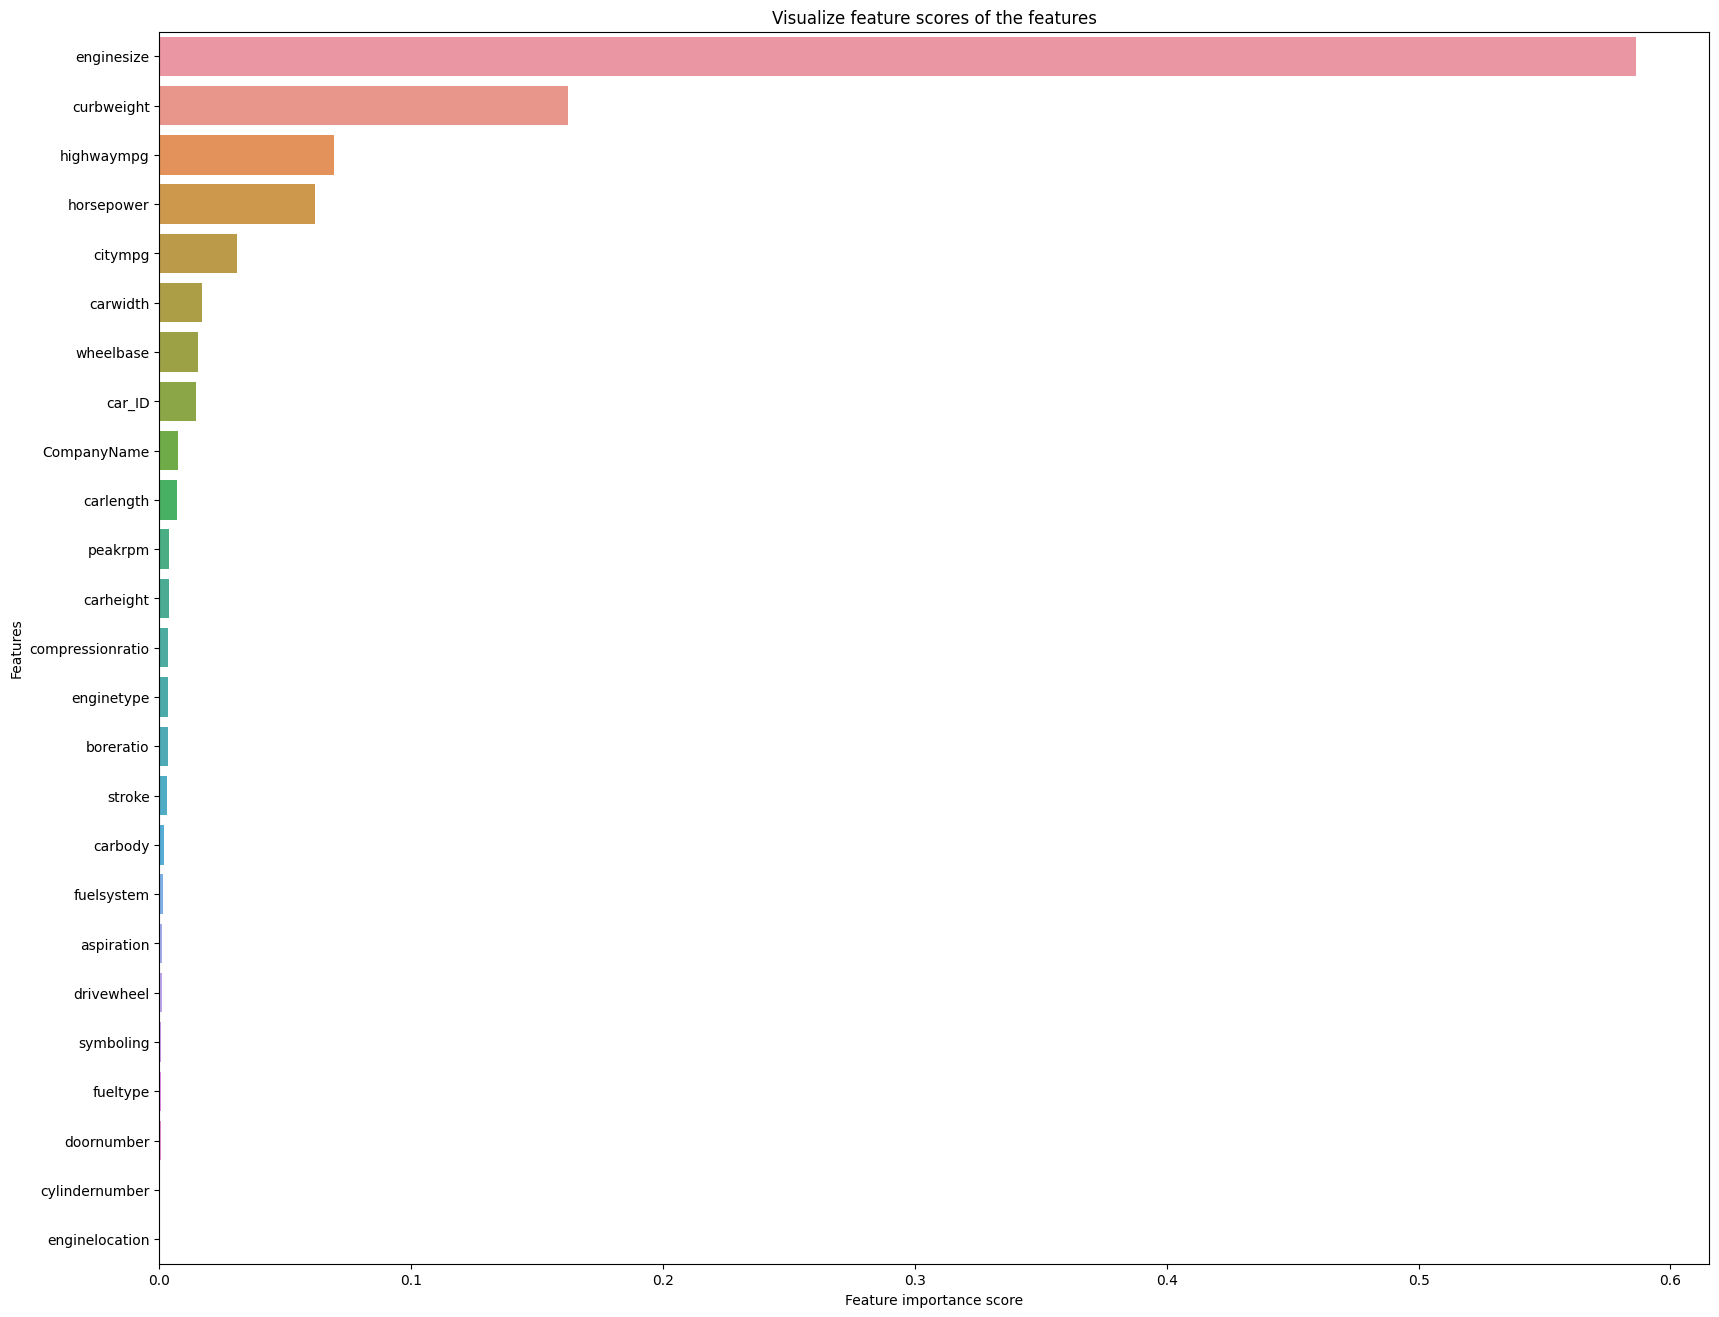

In [507]:
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=feature_scores, \
                 orient = 'h', order=feature_scores)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

###Interpretation of results

After running a random regressor, it identifies the features below are the most important in determing price.

* enginesize          0.674760
* curbweight          0.164154
* highwaympg          0.045297
* wheelbase           0.025406
* horsepower          0.017938
* carwidth            0.011901
* car_ID              0.010033
* compressionratio    0.009735
* citympg             0.007997
* peakrpm             0.005384
* CarName             0.004921
* carheight           0.003029

To test the significance of these results we will use a regression model to validate if these results are true. We will only keep the features that have a t value of below our alpha of 5%


####Fit the data on test set

In [508]:
y_pred = rf.predict(rescaledX_test)

In [509]:
y_pred

array([12836.43   ,  6995.71   ,  6467.555  ,  9106.655  , 11626.62   ,
       13855.91   , 12831.91   ,  5970.745  , 14597.82   ,  5649.77   ,
        6955.57   , 33772.015  ,  6872.25   , 36157.175  , 33772.015  ,
       14470.36334, 32274.49667,  8821.155  , 14246.76   ,  8056.615  ,
        7191.95   , 13984.86   ,  8206.18   ,  6676.845  ,  5707.055  ,
        7459.175  ,  7076.805  , 15723.58   , 14682.39   , 17486.3    ,
        6506.26   ,  5652.66   ,  9856.67   ,  7174.45   , 20246.98   ,
       15311.44   , 15817.51   ,  5629.985  ,  5672.81   ,  5683.84   ,
       39481.62   ])

In [510]:
y_pred = rf.predict(rescaledX_test)

In [511]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2183.778821219512
Mean Squared Error: 8657003.327582
Root Mean Squared Error: 2942.2785944879524
r2_score: 0.8968659588373691


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

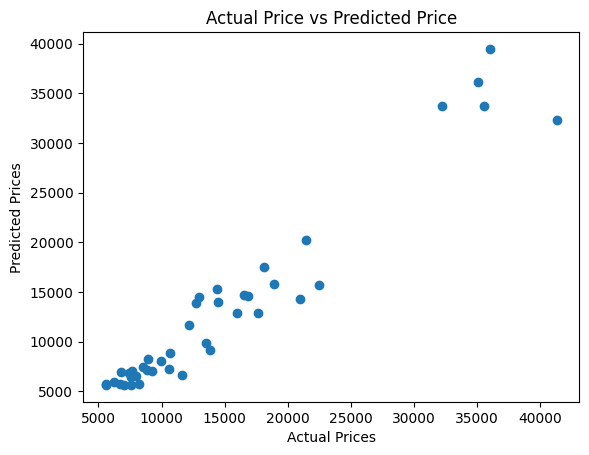

In [512]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel ("Predicted Prices")
plt.title("Actual Price vs Predicted Price")

### Linear Regression to test features significant in predicting price.

In [513]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [514]:
print(df)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)

     car_ID  symboling  CompanyName  fueltype  aspiration  doornumber  \
0         1          3            0         1           0           1   
1         2          3            0         1           0           1   
2         3          1            0         1           0           1   
3         4          2            1         1           0           0   
4         5          2            1         1           0           0   
..      ...        ...          ...       ...         ...         ...   
200     201         -1           21         1           0           0   
201     202         -1           21         1           1           0   
202     203         -1           21         1           0           0   
203     204         -1           21         0           1           0   
204     205         -1           21         1           1           0   

     carbody  drivewheel  enginelocation  wheelbase  ...  enginesize  \
0          0           2               0       88.6

In [515]:
df_train = df.sample(frac=0.75,random_state=200)

In [516]:
df_test= df.drop(df_train.index)

In [517]:
df_train.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
69,70,0,3,0,1,1,1,2,0,106.7,...,183,3,3.58,3.64,21.50,123,4350,22,25,28176.0
132,133,3,17,1,0,1,2,1,0,99.1,...,121,5,3.54,3.07,9.31,110,5250,21,28,11850.0
188,189,2,20,1,0,0,3,1,0,97.3,...,109,5,3.19,3.40,10.00,100,5500,26,32,9995.0
192,193,0,20,0,1,0,3,1,0,100.4,...,97,3,3.01,3.40,23.00,68,4500,33,38,13845.0
174,175,-1,19,0,1,0,3,1,0,102.4,...,110,3,3.27,3.35,22.50,73,4500,30,33,10698.0


In [518]:
df_test.shape

(51, 26)

In [519]:
df_train.shape

(154, 26)

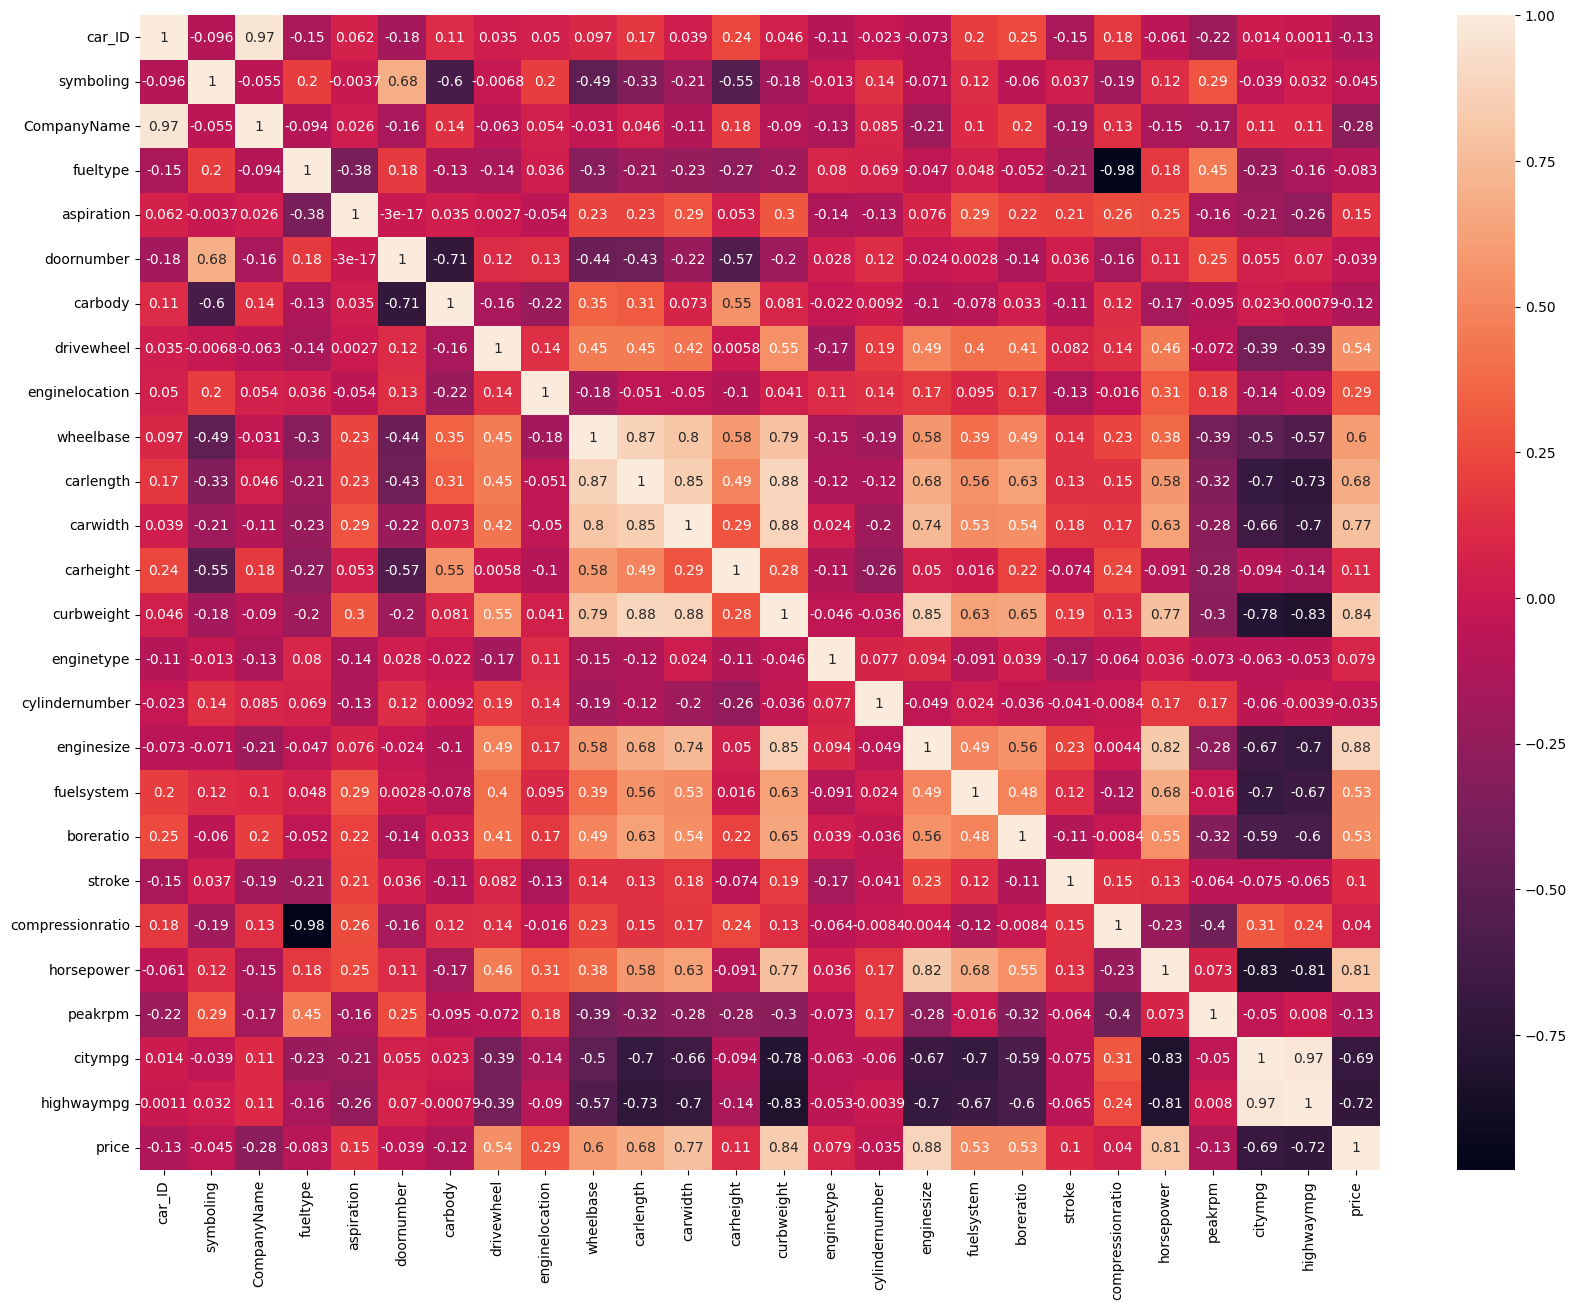

In [520]:
correlations = df_train.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlations, annot = True);

Regression model

In [521]:
lrmodel = smf.ols("price ~ enginesize + CompanyName  + car_ID  + carwidth  + stroke  + peakrpm  + aspiration  + drivewheel + enginelocation", data=df_train).fit()

###Dropped features(insignificant at 5% alpha threshold)

Highwaympg,cylindernumber, car_ID, compressionratio, carlength, wheelbase, carheight, boreratio, enginetype, symboling, fuelsystem, fueltype,carbody,doornumber,curbweight

In [522]:
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           6.15e-66
Time:                        00:15:08   Log-Likelihood:                -1425.0
No. Observations:                 154   AIC:                             2870.
Df Residuals:                     144   BIC:                             2900.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.126e+04   1.16e+04     -5.

In [523]:
predictions = lrmodel.predict(df_test)

In [524]:
Y_pred = predictions
Y_pred= Y_pred.to_frame()

In [525]:
Y_pred.rename( columns={0:'Prediction'}, inplace=True )

In [526]:
Y_pred

,Prediction
1,16382.463085
3,13209.270460
7,21269.176874
14,19532.022276
16,26201.867355
20,8160.567348
23,9313.417717
26,7787.103996
35,8178.321446
42,11296.649784


In [527]:
testrsquared = df_test['price'].corr(Y_pred['Prediction'])**2
testrsquared

0.8899748419558026

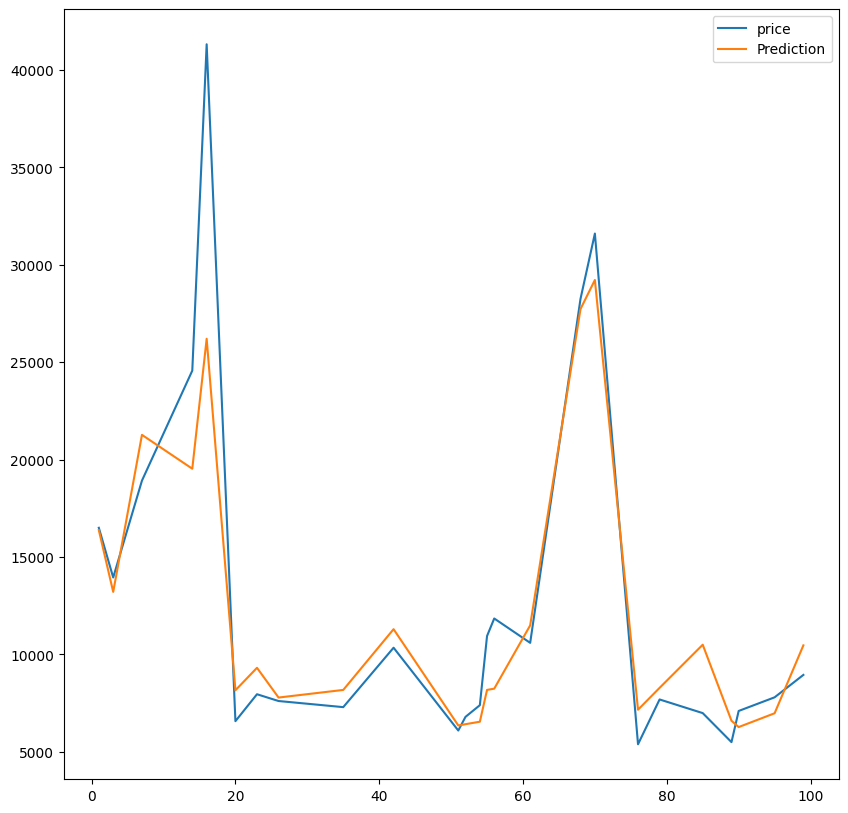

In [528]:
plt.figure(figsize=(10,10))
df_test["price"][:25,].plot.line()
Y_pred["Prediction"][:25,].plot.line()
plt.legend()
plt.show()

Conclusion

* Based on the business problem, we are required to model the price of cars with
the available independent features.
* For our final model the features good at determining price for the decision makers are shown below.
All these features are significant at the alpha threshold of 5%

* Final features: Engine size,Car Name,Car ID,Car Width,Stroke,Peak rpm,Aspiration, Drivewheel,Engine location. These features also enable management to understand the pricing dynamics of a new market

* Before deploying the model, we would have to evaluate it to ensure it doesn't violate the rules of linearity